In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from pandas import read_csv
from datetime import datetime
	
df = pd.read_csv('/content/drive/MyDrive/dataAir_phrakanong.csv', usecols=[0,1,2,3,4,5,6,7,8,9,10,11], engine='python',parse_dates=['date'], skipinitialspace=True, index_col=0)
df 

,pm10,co,no,no2,nox,pm25,avgT,humid,pressure-monthly,windDir,windSpd
date,,,,,,,,,,,
2018-01-01,65.291667,1.33,74.2,45.4,119.5,NaN,27.1,70,1009.40,100.0,9.0
2018-01-02,77.041667,1.35,73.0,51.3,124.2,NaN,27.5,67,1009.40,120.0,4.0
2018-01-03,96.708333,1.73,98.5,58.0,156.5,NaN,28.2,66,1009.40,60.0,4.0
2018-01-04,115.125000,1.76,92.4,62.7,155.2,NaN,29.3,64,1009.40,330.0,6.0
2018-01-05,116.625000,1.35,51.1,60.9,111.9,NaN,30.4,63,1009.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-27,84.000000,1.50,117.6,35.2,152.9,19.0,28.5,79,1009.24,120.0,9.0
2022-10-28,92.000000,1.60,127.1,38.1,165.2,21.0,29.6,72,1009.24,170.0,7.0
2022-10-29,90.000000,1.30,92.0,43.1,135.1,23.0,29.5,62,1009.24,120.0,13.0


In [4]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
pm10,1721.0,57.31,29.08,1.17,35.00,52.00,73.00,218.50
co,1737.0,0.97,0.54,0.04,0.52,0.83,1.40,2.53
no,1739.0,47.45,40.48,0.10,13.20,34.70,74.02,207.20
no2,1739.0,24.82,16.06,0.96,12.35,19.10,35.50,105.56
nox,1738.0,72.09,54.36,5.03,26.92,53.30,110.84,276.50
pm25,1016.0,23.01,14.23,3.00,13.00,18.00,30.00,96.00
avgT,1695.0,30.24,1.76,16.60,29.30,30.30,31.30,35.10
humid,1765.0,73.93,8.26,32.00,69.00,74.00,79.00,97.00
pressure-monthly,1765.0,1008.48,2.13,1004.94,1006.53,1008.20,1010.15,1012.61
windDir,1735.0,188.91,85.55,0.00,120.00,190.00,250.00,360.00


In [5]:
dd = df.drop(['pm10', 'no','no2', 'nox', 'co', 'avgT', 'humid', 'pressure-monthly','windDir','windSpd'],axis = 1)
dd.head()

,pm25
date,
2018-01-01,NaN
2018-01-02,NaN
2018-01-03,NaN
2018-01-04,NaN
2018-01-05,NaN


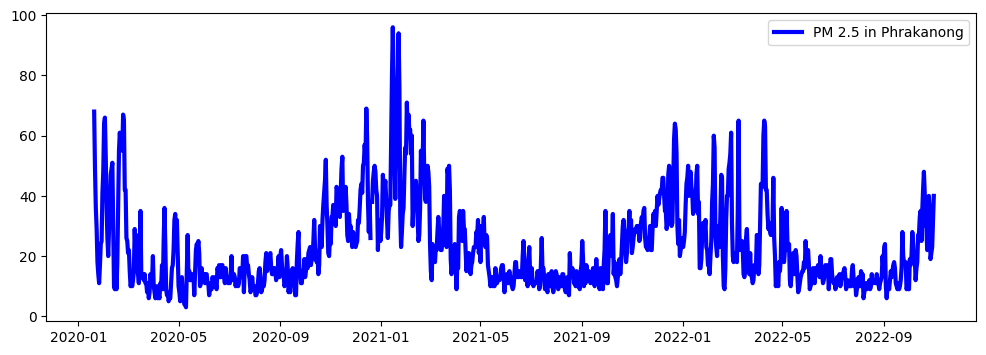

In [6]:
plt.figure(figsize=(12, 4))
plt.plot(dd, 'b', lw=3.0, label='PM 2.5 in Phrakanong')
plt.legend()
plt.show()

In [7]:
y_col='pm25'

In [8]:
df.dropna(subset=[y_col], inplace=True)
df = df.reset_index(drop=True)
df

,pm10,co,no,no2,nox,pm25,avgT,humid,pressure-monthly,windDir,windSpd
0,70.0,1.04,49.7,24.4,74.1,42.0,30.1,77,1011.12,130.0,6.0
1,116.0,1.36,68.2,34.7,102.9,68.0,30.6,76,1011.12,150.0,5.0
2,95.0,1.06,47.3,22.9,70.2,49.0,30.3,77,1011.12,160.0,6.0
3,74.0,0.74,16.6,26.3,42.8,36.0,31.6,77,1011.12,150.0,6.0
4,57.0,0.55,6.5,14.1,20.6,29.0,30.8,75,1011.12,160.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
1011,84.0,1.50,117.6,35.2,152.9,19.0,28.5,79,1009.24,120.0,9.0
1012,92.0,1.60,127.1,38.1,165.2,21.0,29.6,72,1009.24,170.0,7.0
1013,90.0,1.30,92.0,43.1,135.1,23.0,29.5,62,1009.24,120.0,13.0
1014,95.0,1.30,76.9,51.5,128.4,32.0,30.0,62,1009.24,120.0,13.0


In [9]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pm10              994 non-null    float64
 1   co                1015 non-null   float64
 2   no                1016 non-null   float64
 3   no2               1016 non-null   float64
 4   nox               1016 non-null   float64
 5   pm25              1016 non-null   float64
 6   avgT              1004 non-null   float64
 7   humid             1016 non-null   int64  
 8   pressure-monthly  1016 non-null   float64
 9   windDir           1004 non-null   float64
 10  windSpd           1004 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 87.4 KB


(1016, 11)

In [10]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
data_sc = sc.fit_transform(df.values)
data_sc[:11]

array([[0.44169929, 0.41626977, 0.29538334, 0.22409178, 0.32054472,
        0.41935484, 0.63793103, 0.6       , 0.80212483, 0.36111111,
        0.1       ],
       [0.73689277, 0.55648695, 0.40555656, 0.32256214, 0.4542017 ,
        0.69892473, 0.68103448, 0.58      , 0.80212483, 0.41666667,
        0.05      ],
       [0.60213053, 0.42503334, 0.2810906 , 0.20975143, 0.30244533,
        0.49462366, 0.65517241, 0.6       , 0.80212483, 0.44444444,
        0.1       ],
       [0.46736829, 0.28481616, 0.0982626 , 0.24225621, 0.17528556,
        0.35483871, 0.76724138, 0.6       , 0.80212483, 0.41666667,
        0.1       ],
       [0.35827504, 0.2015622 , 0.03811398, 0.12562141, 0.07225831,
        0.27956989, 0.69827586, 0.56      , 0.80212483, 0.44444444,
        0.15      ],
       [0.2491818 , 0.17088969, 0.03930504, 0.0998088 , 0.06065614,
        0.16129032, 0.68103448, 0.58      , 0.80212483, 0.66666667,
        0.2       ],
       [0.22993005, 0.12269004, 0.03096761, 0.0749522 , 0.

In [ ]:
n_train = int(df.shape[0] * 0.80)
n_train

812

In [ ]:
def convertToMatrix(data, step=2):
    X, Y, = [], []
    for i in range(len(data)-step):
        d = i + step
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

In [ ]:
X, y = data_sc[0:n_train], data_sc[n_train:]
X.shape, y.shape

((812, 11), (204, 11))

In [ ]:
import numpy as np

def create_X_Y(ts: list, lag: int) -> tuple:

    X, Y = [], []

    if len(ts) - lag <= 0:
        X.append(ts)
    else:
        for i in range(len(ts) - lag):
            Y.append(ts[i + lag])
            X.append(ts[i:(i + lag)])

    X, Y = np.array(X), np.array(Y)

    # Reshaping the X array to an LSTM input shape 
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    return X, Y

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

n_layer = 50

n_lag = 3


model = Sequential()
model.add(LSTM(n_layer, activation='relu', input_shape=(n_lag, 1)))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mse')

In [ ]:
# Data wrangling
import pandas as pd
import numpy as np

# Deep learning: 
from keras.models import Sequential
from keras.layers import LSTM, Dense


class DeepModelTS():
    """
    A class to create a deep time series model
    """
    def __init__(
        self, 
        data: pd.DataFrame, 
        Y_var: str,
        lag: int,
        LSTM_layer_depth: int, 
        epochs=10, 
        batch_size=256,
        train_test_split=0
    ):

        self.data = data 
        self.Y_var = Y_var 
        self.lag = lag 
        self.LSTM_layer_depth = LSTM_layer_depth
        self.batch_size = batch_size
        self.epochs = epochs
        self.train_test_split = train_test_split

    @staticmethod
    def create_X_Y(ts: list, lag: int) -> tuple:
        """
        A method to create X and Y matrix from a time series list for the training of 
        deep learning models 
        """
        X, Y = [], []

        if len(ts) - lag <= 0:
            X.append(ts)
        else:
            for i in range(len(ts) - lag):
                Y.append(ts[i + lag])
                X.append(ts[i:(i + lag)])

        X, Y = np.array(X), np.array(Y)

        # Reshaping the X array to an LSTM input shape 
        X = np.reshape(X, (X.shape[0], X.shape[1], 1))

        return X, Y         

    def create_data_for_NN(
        self,
        use_last_n=None
        ):
        """
        A method to create data for the neural network model
        """
        # Extracting the main variable we want to model/forecast
        y = self.data[self.Y_var].tolist()

        # Subseting the time series if needed
        if use_last_n is not None:
            y = y[-use_last_n:]

        # The X matrix will hold the lags of Y 
        X, Y = self.create_X_Y(y, self.lag)

        # Creating training and test sets 
        X_train = X
        X_test = []

        Y_train = Y
        Y_test = []

        if self.train_test_split > 0:
            index = round(len(X) * self.train_test_split)
            X_train = X[:(len(X) - index)]
            X_test = X[-index:]     
            
            Y_train = Y[:(len(X) - index)]
            Y_test = Y[-index:]

        return X_train, X_test, Y_train, Y_test

    def LSTModel(self):
        """
        A method to fit the LSTM model 
        """
        # Getting the data 
        X_train, X_test, Y_train, Y_test = self.create_data_for_NN()

        # Defining the model
        model = Sequential()
        model.add(LSTM(self.LSTM_layer_depth, activation='relu', input_shape=(self.lag, 1)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')

        # Defining the model parameter dict 
        keras_dict = {
            'x': X_train,
            'y': Y_train,
            'batch_size': self.batch_size,
            'epochs': self.epochs,
            'shuffle': False
        }

        if self.train_test_split > 0:
            keras_dict.update({
                'validation_data': (X_test, Y_test)
            })

        # Fitting the model 
        model.fit(
            **keras_dict
        )

        # Saving the model to the class 
        self.model = model

        return model

    def predict(self) -> list:
        """
        A method to predict using the test data used in creating the class
        """
        yhat = []

        if(self.train_test_split > 0):
        
            # Getting the last n time series 
            _, X_test, _, _ = self.create_data_for_NN()        

            # Making the prediction list 
            yhat = [y[0] for y in self.model.predict(X_test)]

        return yhat

    def predict_n_ahead(self, n_ahead: int):
        """
        A method to predict n time steps ahead
        """    
        X, _, _, _ = self.create_data_for_NN(use_last_n=self.lag)        

        # Making the prediction list 
        yhat = []

        for _ in range(n_ahead):
            # Making the prediction
            fc = self.model.predict(X)
            yhat.append(fc)

            # Creating a new input matrix for forecasting
            X = np.append(X, fc)

            # Ommiting the first variable
            X = np.delete(X, 0)

            # Reshaping for the next iteration
            X = np.reshape(X, (1, len(X), 1))

        return yhat    

In [ ]:
# Initiating the class 
deep_learner = DeepModelTS(
data = df,
Y_var = 'pm25',
lag = 6,
LSTM_layer_depth = 50,
epochs = 60,
batch_size = 256,
train_test_split = 0.15
)

In [ ]:
model = deep_learner.LSTModel() 

Epoch 1/60
4/4 [==============================] - 2s 121ms/step - loss: 642.8741 - val_loss: 220.1635
Epoch 2/60
4/4 [==============================] - 0s 16ms/step - loss: 494.7540 - val_loss: 161.1231
Epoch 3/60
4/4 [==============================] - 0s 17ms/step - loss: 331.5660 - val_loss: 100.0884
Epoch 4/60
4/4 [==============================] - 0s 16ms/step - loss: 209.2056 - val_loss: 58.0112
Epoch 5/60
4/4 [==============================] - 0s 19ms/step - loss: 176.1112 - val_loss: 45.4697
Epoch 6/60
4/4 [==============================] - 0s 16ms/step - loss: 154.4854 - val_loss: 39.8184
Epoch 7/60
4/4 [==============================] - 0s 20ms/step - loss: 123.2348 - val_loss: 36.9413
Epoch 8/60
4/4 [==============================] - 0s 17ms/step - loss: 103.8853 - val_loss: 34.3727
Epoch 9/60
4/4 [==============================] - 0s 27ms/step - loss: 91.4333 - val_loss: 30.5187
Epoch 10/60
4/4 [==============================] - 0s 39ms/step - loss: 80.6272 - val_loss: 27.60

In [ ]:
# test พยากรณ์กราฟ
yhat = deep_learner.predict()
# Constructing the forecast dataframe
fc = df.tail(len(yhat)).copy() #ข้อมูลส่วนท้ายเป็น test
fc.reset_index(inplace=True)
fc['forecast'] = yhat

5/5 [==============================] - 1s 5ms/step


In [ ]:
# test
deep_learner = DeepModelTS(
    data=df,
    Y_var='pm25',
    lag=48,
    LSTM_layer_depth=64,
    epochs=10,
    train_test_split=0
)
# Fitting the model
deep_learner.LSTModel()
# Forecasting n steps ahead
n_ahead = 7
yhat = deep_learner.predict_n_ahead(n_ahead)
yhat = [y[0][0] for y in yhat]

Epoch 1/10
4/4 [==============================] - 3s 154ms/step - loss: 860.9758
Epoch 2/10
4/4 [==============================] - 1s 143ms/step - loss: 740.0345
Epoch 3/10
4/4 [==============================] - 1s 139ms/step - loss: 668.7661
Epoch 4/10
4/4 [==============================] - 0s 76ms/step - loss: 624.1514
Epoch 5/10
4/4 [==============================] - 0s 75ms/step - loss: 549.7546
Epoch 6/10
4/4 [==============================] - 0s 72ms/step - loss: 476.5030
Epoch 7/10
4/4 [==============================] - 0s 74ms/step - loss: 455.0392
Epoch 8/10
4/4 [==============================] - 0s 76ms/step - loss: 471.7225
Epoch 9/10
4/4 [==============================] - 0s 74ms/step - loss: 497.9922
Epoch 10/10
1/1 [==============================] - 0s 27ms/step


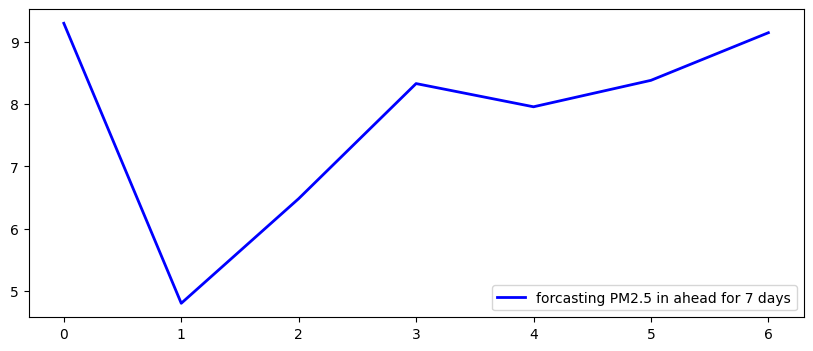

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(yhat, 'b', lw=2.0, label='forcasting PM2.5 in ahead for 7 days')
plt.legend()
plt.show()

In [ ]:
predict = pd.DataFrame(yhat)
ypred = predict.rename(columns={0:'พยากรณ์ PM2.5'})
ypred

,พยากรณ์ PM2.5
0,9.296588
1,4.802760
2,6.482110
3,8.328773
4,7.956264
5,8.380796
6,9.145210


In [ ]:
predict = pd.DataFrame(yhat)
ypred = predict.rename(columns={0:'พยากรณ์ PM2.5'}).round(0)
ypred

,พยากรณ์ PM2.5
0,9.0
1,5.0
2,6.0
3,8.0
4,8.0
5,8.0
6,9.0


In [ ]:
ypred.mean().round(0)

พยากรณ์ PM2.5    8.0
dtype: float32

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ypred,yhat)
p_mse = mse*100
print('MSE',p_mse)
print('RMSE' , np.sqrt(p_mse))

MSE 9.077055752277374
RMSE 3.012815253592124
